In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [74]:
digitos = load_digits() #Este conjunto de datos es para hacer imagenes
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [76]:
digitos["data"][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [78]:
digitos["data"][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

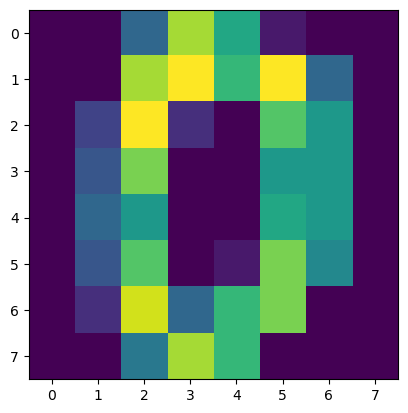

In [80]:
plt.imshow(digitos["data"][0].reshape(8, 8))

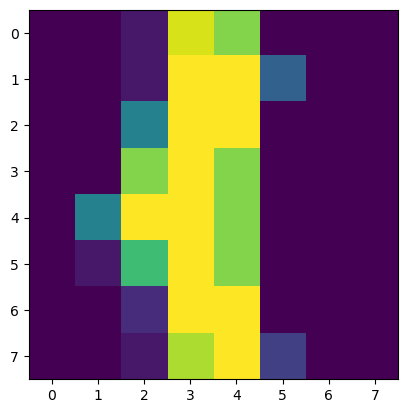

In [82]:
plt.imshow(digitos["data"][99].reshape(8, 8))

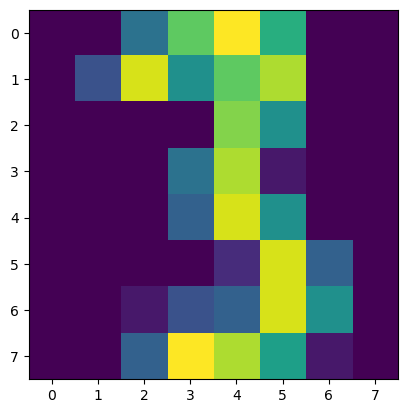

In [84]:
plt.imshow(digitos["data"][859].reshape(8, 8))

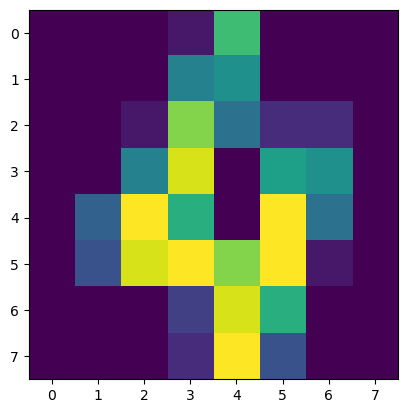

In [86]:
plt.imshow(digitos.images[4]); #Traigo el numero justo

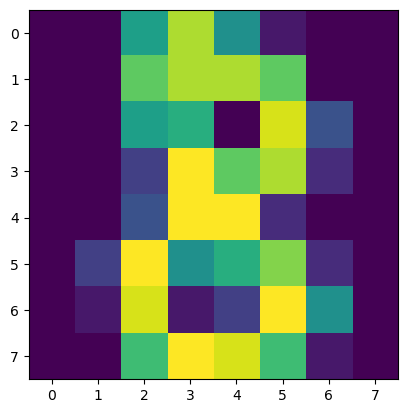

In [87]:
plt.imshow(digitos.images[8]); #Traigo el numero justo

In [90]:
X = digitos.data

In [92]:
#Normalizar nos aseguramos que todos comiencen y terminen en el mismo rango numerico
X = X/16.0 #Reduzco la escala sin afectar los resultados

In [94]:
X_entrena,X_prueba = train_test_split(X, test_size=0.2, random_state=42)

In [96]:
imagen_entrada = Input(shape=(64, )) #Creo una variable que instancia una nueva capa de entrada pero es del modelo, no es igual al comun

In [98]:
#Estamos configurando el modelo y es dense porque sera mucho dato es denso
#32 = cantidad de nodos
#activation= funcion de actividacion, relu=activicacion mas comun
#variable a la cual sera aplicada
codificado = Dense(32, activation="relu") (imagen_entrada)


In [100]:
decodificado = Dense(64, activation="sigmoid") (codificado)

In [102]:
#Aplicamosel Modelo
autoencoder = Model(imagen_entrada, decodificado)

In [104]:
#adam = Optimizador mas comun ym ejor resultado, minimiza la dif entre la entrada y la salida
#La perdida que tenemos
autoencoder.compile(optimizer="adam",
                   loss="binary_crossentropy"
                   )

In [106]:
autoencoder.fit(X_entrena, 
               X_entrena,
               epochs=100,     #Numero de veces que va a repasar 
               batch_size=256, #Tamaño de lotes que hara al mismo tiempo
               shuffle=True,   #Los datos se van a mezclar
                validation_data=(X_prueba, X_prueba)
               )


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.7326 - val_loss: 0.7107
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7046 - val_loss: 0.6865
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6804 - val_loss: 0.6641
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6583 - val_loss: 0.6410
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6345 - val_loss: 0.6155
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6078 - val_loss: 0.5869
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5789 - val_loss: 0.5560
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5475 - val_loss: 0.5249
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5162 - val_loss: 0.4961
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4880 - val_loss: 0.4713
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4643 - val_loss: 0.4512
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4445 - val_loss: 0.4355


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


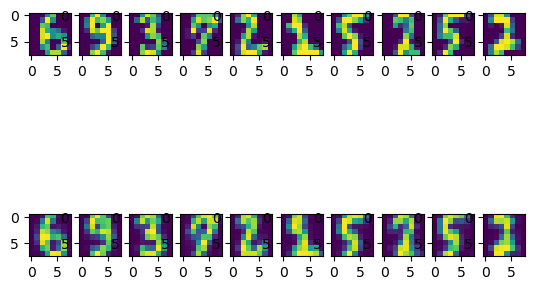

In [107]:
for i in range(10):
    plt.subplot(2,
               10,
               i + 1)
    plt.imshow(X_prueba[i].reshape(8,8))

    plt.subplot(2,
               10,
               i + 1 + 10)
    plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8,8));